In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [17]:
with open('train.p', mode='rb') as training_data:
    train = pickle.load(training_data)

with open('valid.p', mode='rb') as valid_data:
    valid = pickle.load(valid_data)

with open('test.p', mode='rb') as test_data:
    test = pickle.load(test_data)

In [18]:
X_train, y_train = train['features'], train['labels']
X_val, y_val = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Visualize Data

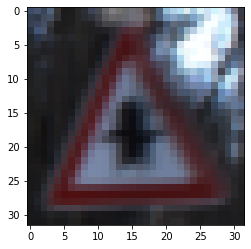

In [19]:
# random visualization
plt.imshow(X_train[np.random.choice(len(X_train))])
plt.show()

### Data Preparation

Grayscale Image

In [20]:
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_val = np.sum(X_val/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

In [21]:
X_train.shape

(34799, 32, 32, 1)

Normalize Image

In [22]:
X_train = (X_train - 128) / 128
X_val = (X_val - 128) / 128
X_test = (X_test - 128) / 128

In [23]:
X_train.shape

(34799, 32, 32, 1)

### Model Train

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, AveragePooling2D, Conv2D
from tensorflow.keras.optimizers import Adam

In [25]:
# LeNet Architechture
i = Input(shape=(32, 32, 1))
x = Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(i)
x = AveragePooling2D()(x)
x = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(x)
x = AveragePooling2D()(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(43, activation='softmax')(x) # 43 classes output

In [26]:
model = Model(i, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [28]:
r = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128)

Epoch 1/50
272/272 [==============================] - 18s 68ms/step - loss: 1.9656 - accuracy: 0.4583 - val_loss: 1.0497 - val_accuracy: 0.6844
Epoch 2/50
272/272 [==============================] - 18s 67ms/step - loss: 0.6476 - accuracy: 0.8119 - val_loss: 0.7525 - val_accuracy: 0.7955
Epoch 3/50
272/272 [==============================] - 18s 67ms/step - loss: 0.4082 - accuracy: 0.8857 - val_loss: 0.7003 - val_accuracy: 0.8098
Epoch 4/50
272/272 [==============================] - 18s 67ms/step - loss: 0.3025 - accuracy: 0.9175 - val_loss: 0.6960 - val_accuracy: 0.8129
Epoch 5/50
272/272 [==============================] - 18s 66ms/step - loss: 0.2408 - accuracy: 0.9347 - val_loss: 0.6426 - val_accuracy: 0.8320
Epoch 6/50
272/272 [==============================] - 18s 66ms/step - loss: 0.1992 - accuracy: 0.9461 - val_loss: 0.5942 - val_accuracy: 0.8517
Epoch 7/50
272/272 [==============================] - 18s 65ms/step - loss: 0.1635 - accuracy: 0.9561 - val_loss: 0.6233 - val_accuracy:

### Model Evaluation

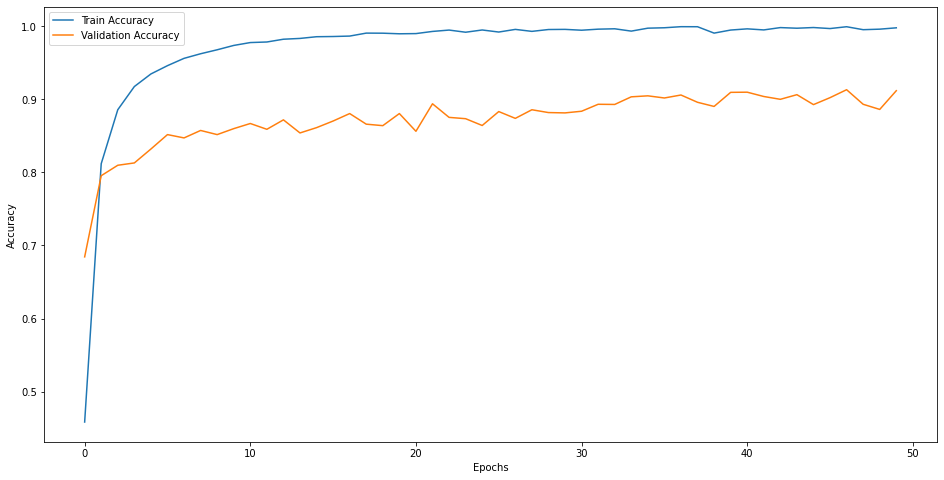

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

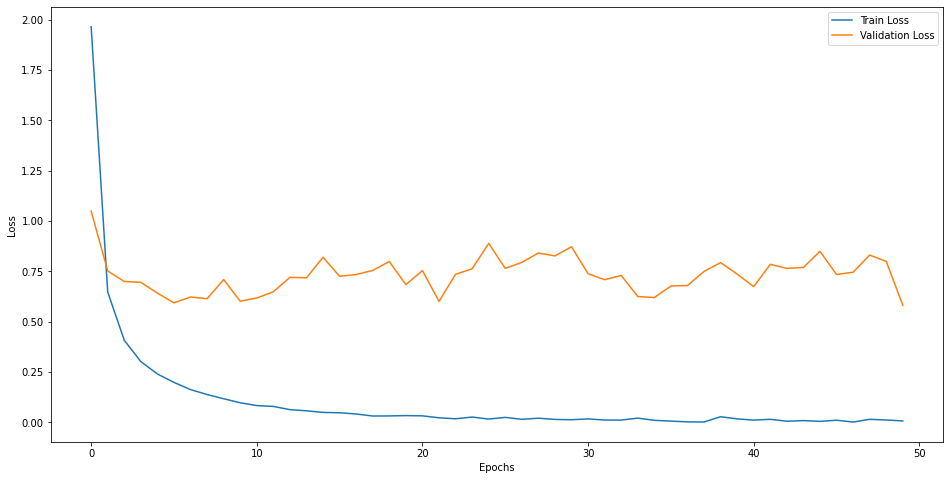

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predictions

In [35]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 4s 9ms/step - loss: 1.0803 - accuracy: 0.8994


[1.0803077220916748, 0.8993666172027588]

In [31]:
y_pred = model.predict(X_test).argmax(axis=1)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

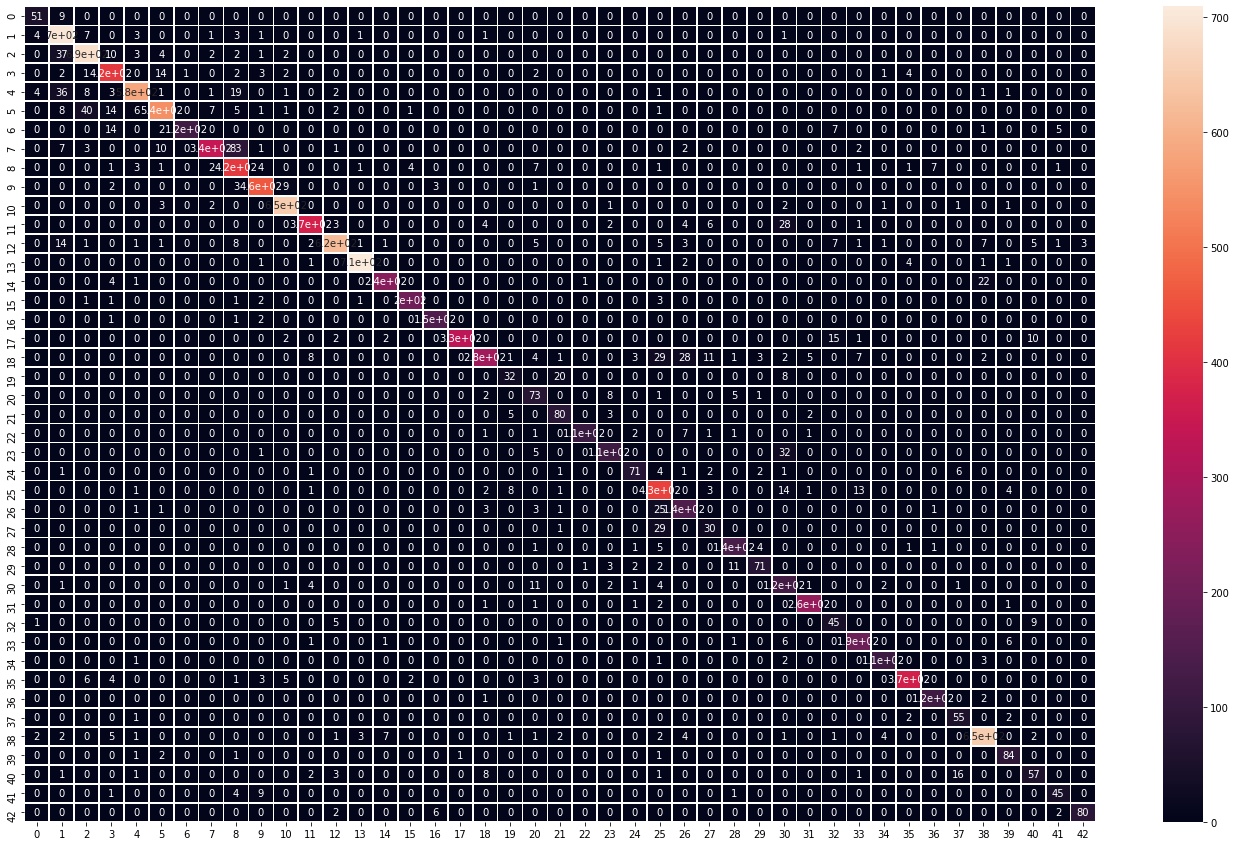

In [33]:
plt.figure(figsize=(24, 15))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.7)
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        60
           1       0.86      0.97      0.91       720
           2       0.91      0.92      0.92       750
           3       0.87      0.93      0.90       450
           4       0.96      0.88      0.92       660
           5       0.93      0.86      0.90       630
           6       0.99      0.81      0.89       150
           7       0.96      0.76      0.85       450
           8       0.76      0.92      0.83       450
           9       0.94      0.96      0.95       480
          10       0.97      0.98      0.97       660
          11       0.95      0.89      0.92       420
          12       0.97      0.90      0.93       690
          13       0.99      0.98      0.99       720
          14       0.96      0.90      0.93       270
          15       0.97      0.96      0.96       210
          16       0.94      0.97      0.96       150
          17       1.00    